### **Problem Understanding**

Geomagnetic storms are caused by the interaction of solar wind with Earth's magnetic field. The resulting disturbances in the geomagnetic field can wreak havoc on GPS systems, satellite communication, electric power transmission, and more. These disturbances are measured by the Disturbance Storm-Time Index, or [Dst](https://www.ngdc.noaa.gov/stp/GEOMAG/dst.html).

The task is to forecast Dst in real-time to help satellite operators, power grid operators, and users of magnetic navigation systems prepare for magnetic disturbances.

The primary input data  is provided by sensor data from two satellites, NASA's [ACE](https://www.swpc.noaa.gov/products/ace-real-time-solar-wind) and NOAA's DSCOVR. This space weather data includes sensor readings related to both the interplanetary magnetic field and plasma from solar wind.


> **The Interplanetary Magnetic Field (IMF)**
>
The interplanetary magnetic field (IMF) plays a huge rule in how the solar wind interacts with Earth’s magnetosphere. In this article we will learn what the interplanetary magnetic field is and how it affects auroral activity here on Earth.

> **The Sun’s magnetic field**
>
During solar minimum, the magnetic field of the Sun looks similar to Earth’s magnetic field. It looks a bit like an ordinary bar magnet with closed lines close to the equator and open field lines near the poles. Scientist call those areas a dipole. The dipole field of the Sun is about as strong as a magnet on a refrigerator (around 50 gauss). The magnetic field of the Earth is about 100 times weaker.
Around solar maximum, when the Sun reaches her maximum activity, many sunspots are visible on the visible solar disk. These sunspots are filled with magnetism and large magnetic field lines which run material along them. These field lines are often hundreds of times stronger than the surrounding dipole. This causes the magnetic field around the Sun to be a very complex magnetic field with many disturbed field lines.
The magnetic field of our Sun doesn’t stay around the Sun itself. The solar wind carries it through the Solar System until it reaches the heliopause. The heliopause is the place where the solar wind comes to a stop and where it collides with the interstellar medium. Because the Sun turns around her axis (once in about 25 days) the interplanetary magnetic field has a spiral shape which is called the Parker Spiral.

> **Bt value**
>
The Bt value of the interplanetary magnetic field indicates the total strength of the interplanetary magnetic field. It is a combined measure of the magnetic field strength in the north-south, east-west, and towards-Sun vs. away-from-Sun directions. The higher this value, the better it is for enhanced geomagnetic conditions. We speak of a moderately strong total interplanetary magnetic field when the Bt exceeds 10nT. Strong values start at 20nT and we speak of a very strong total interplanetary magnetic field when values exceed 30nT. The units are in nano-Tesla (nT) — named after Nikola Tesla, the famous physicist, engineer and inventor.

> **Bx, By and Bz**
>
The interplanetary magnetic field is a vector quantity with a three axis component, two of which (Bx and By) are orientated parallel to the ecliptic. The Bx and By components are not important for auroral activity and are therefor not featured on our website. The third component, the Bz value is perpendicular to the ecliptic and is created by waves and other disturbances in the solar wind.

![im1](https://www.spaceweatherlive.com/images/help/IMF/BxByBz.gif)

> **Interaction with Earth’s magnetosphere**
>
The north-south direction of the interplanetary magnetic field (Bz) is the most important ingredient for auroral activity. When the north-south direction (Bz) of the the interplanetary magnetic field is orientated southward, it will connect with Earth’s magnetosphere which points northward. Think of the ordinary bar magnets that you have at home. Two opposite poles attract each other! A (strong) southward Bz can create havoc with Earth’s magnetic field, disrupting the magnetosphere and allowing particles to rain down into our atmosphere along Earth’s magnetic field lines. When these particles collide with the oxygen and nitrogen atoms that make up our atmosphere, it causes them to glow and emit light which we see as aurora.
>
For a geomagnetic storm to develop it is vital that the direction of the interplanetary magnetic field (Bz) turns southward. Continues values of -10nT and lower are good indicators that a geomagnetic storm could develop but the lower this value goes the better it is for auroral activity. Only during extreme events with high solar wind speeds it is possible for a geomagnetic storm (Kp5 or higher) to develop with a northward Bz.


![im2](https://www.spaceweatherlive.com/images/help/IMF/magnetosphere.jpg)
 A schematic diagram showing the interaction between the IMF with a southward Bz and Earth’s magnetosphere.

> **Measuring the interplanetary magnetic field**
>
>The real-time solar wind and interplanetary magnetic field data that you can find on this website come from the Deep Space Climate Observatory (DSCOVR) satellite which is stationed in an orbit around the Sun-Earth Lagrange Point 1. This is a point in space which is always located between the Sun and Earth where the gravity of the Sun and Earth have an equal pull on satellites meaning they can remain in a stable orbit around this point. This point is ideal for solar missions like DSCOVR, as this gives DSCOVR the opportunity to measure the parameters of the solar wind and the interplanetary magnetic field before it arrives at Earth. This gives us a 15 to 60 minute warning time (depending on the solar wind speed) as to what kind of solar wind structures are on their way to Earth.
>
>The Deep Space Climate Observatory (DSCOVR) mission is now the primary source for real-time solar wind and interplanetary magnetic field data but there is one more satellite at the Sun-Earth L1 point that measures the incoming solar wind and and that is the Advanced Composition Explorer. This satellite used to be the primary real-time space weather data source up until July 2016 when DSCOVR become fully operational. The Advanced Composition Explorer (ACE) satellite is still collecting data and now operates mostly as a backup to DSCOVR.

*The location of a satellite at the Sun-Earth L1 point.*
![im3](https://www.spaceweatherlive.com/images/help/zonnewind/L1_animation.gif)


In this notebook  we'll cover how to:

- load the data
- create features using the timedelta index
- generate batches of 32-length sequences for training
- train an LSTM model in Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew


from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import *

import sys, os
import random 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython import display, utils




In [2]:


solar_wind = pd.read_csv("../input/soalr-wind/solar_wind.csv")
solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period", "timedelta"], inplace=True)

dst = pd.read_csv("../input/soalr-wind/labels.csv")
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period", "timedelta"], inplace=True)

sunspots = pd.read_csv("../input/soalr-wind/sunspots.csv")
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period", "timedelta"], inplace=True)

In [3]:
dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

We have nearly 140,000 observations of hourly dst data, representing over 15 years. There are almost twice as many observations in either the train_b or train_c periods than there are train_a. It also seems train_a represents a more intense period, given that it has a lower mean and higher standard deviation. Also note that most of the values are negative.

A very strong magnetic field disturbance has a large Dst value, measured in nano-Teslas (nT). Because these disturbances are usually flowing towards the Earth, the values are negative. Sometimes Dst can be highly positive. During calm conditions, Dst values are situated at or just below 0.



### EDA

In [4]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head()

Solar wind shape:  (8392320, 15)


bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period  timedelta                                                             
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period  timedelta                                                            
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   
        0 days 00:03:00    3.68    0.68       6.17   146.17  6.74     1.97   
        0 days 00:04:00    3.68    0.49       4.62   145.72  6.65     1.77   

                          speed  temperature source  
period  timedelta                                    
train_a 0 days 00:00:00  383.92     110237.0     ac  
        0 days 00:01:00  381.79     123825.0     ac  
        0 days 00:02:00  389.11      82548.0     ac  
        0 days 00:03:00  389.11      82548.0     ac  
        0 days 00:04:00  384.26      94269.0     ac

In [5]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head()

Sunspot shape:  (192, 1)


smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4

We can see that we're mostly working with floats, except for the solar wind source column which tells us which of the two satellites recorded the data. We also see that the size of the solar_wind data is fairly large, close to 8.4 million rows. That makes sense, given we're working with minutely values.

On the other hand, we only have 192 observations of monthly sunspot data. When it comes to feature generation, we should think about the best ways to combine these features given their different frequencies.



In [6]:
solar_wind.groupby("period").describe().T

period                  train_a       train_b       train_c
bx_gse      count  1.575012e+06  3.084130e+06  3.407290e+06
            mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
            std    4.339212e+00  3.627830e+00  3.245485e+00
            min   -5.463000e+01 -2.937000e+01 -4.546000e+01
            25%   -4.960000e+00 -3.070000e+00 -2.800000e+00
...                         ...           ...           ...
temperature min    1.000000e+04  1.496000e+03  0.000000e+00
            25%    4.364900e+04  3.741400e+04  4.007400e+04
            50%    7.923800e+04  8.552400e+04  7.152100e+04
            75%    1.325500e+05  1.873250e+05  1.310880e+05
            max    6.223700e+06  4.206672e+06  5.751308e+06

[112 rows x 3 columns]

In [7]:
sunspots.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

The mean and standard deviation of values in train_a is generally more intense than in the other two periods.

Also our values exist across very different scales. For instance, temperature values are quite high - reaching into the hundreds of thousands Kelvin. Meanwhile, IMF readings are fairly small values, and usually negative. One of the best practices when training deep learning models is scaling your features; we'll definitely want to think about that later on.

Let's do a few visualizations before we move onto feature generation. First, we'll just plot the first 1,000 rows for some of our time series data to get a sense of its shape. Instead of plotting all of our features, let's just choose a few IMF features and a few plasma features.

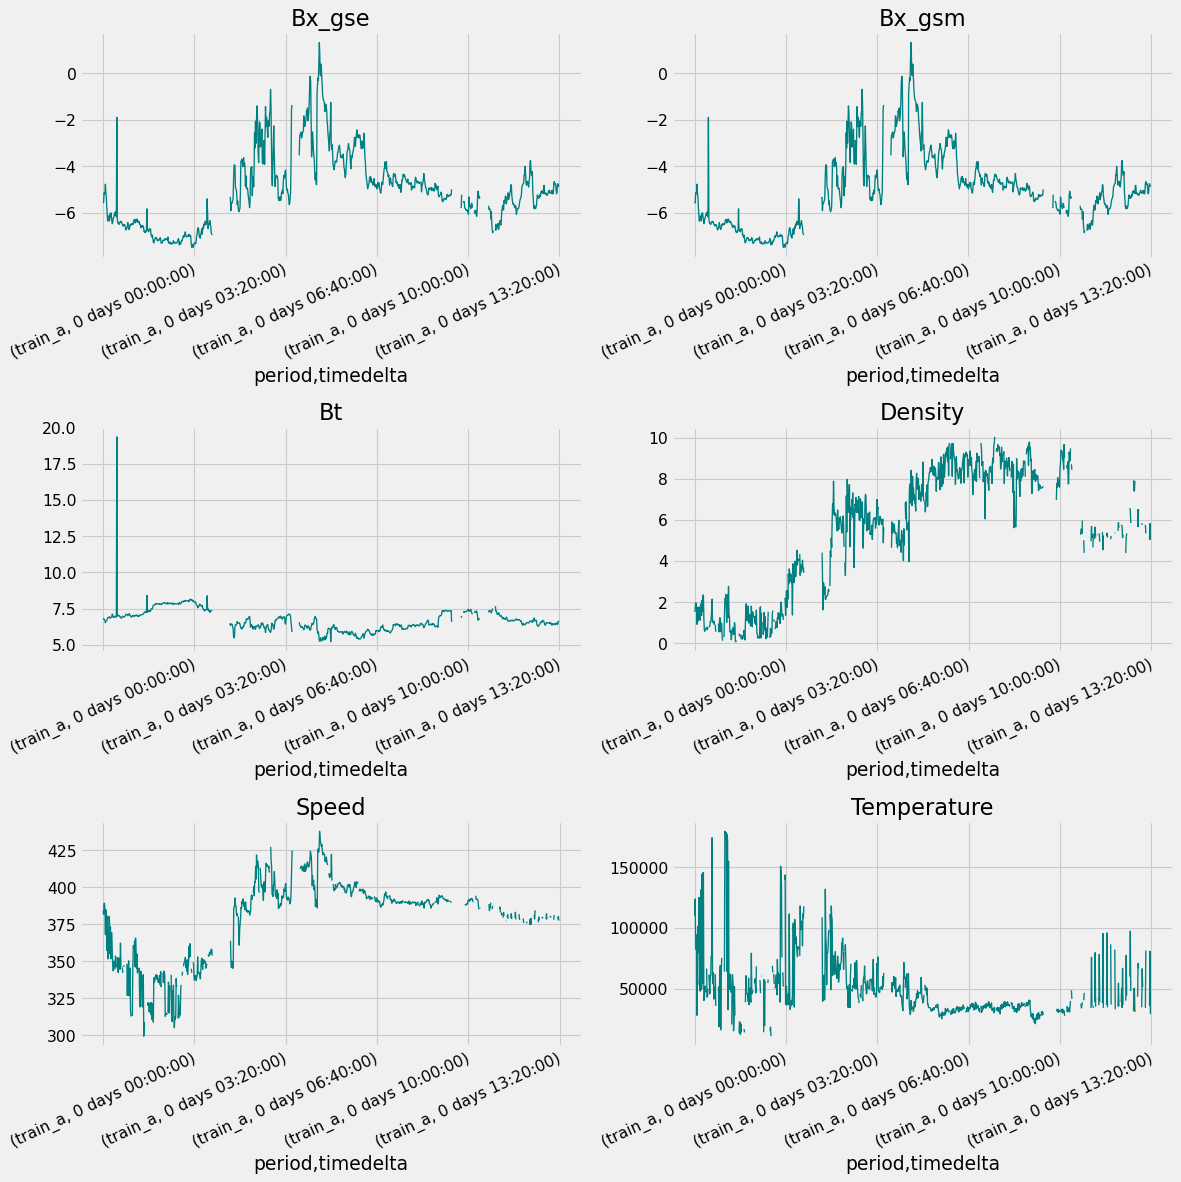

In [8]:
plt.style.use('fivethirtyeight')
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,color='teal', lw=1.2
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()


cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000])

In [9]:
solar_wind.isnull().sum()

bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64

The proportion varies by feature, but every one will require some kind of imputation. Turns out sensor readings from space aren't always reliable - instruments are subject to all kinds of nasty space weather. It's up to us to figure out a sensible way of dealing with these missing values.

Another observation is that the IMF features bx_gsm and bx_gse are closely related. This could present multicollinearity issues if both are present in our model. As our last exploratory step, let's plot a correlation matrix to find other relationships between our features.

<Figure size 1440x1080 with 0 Axes>

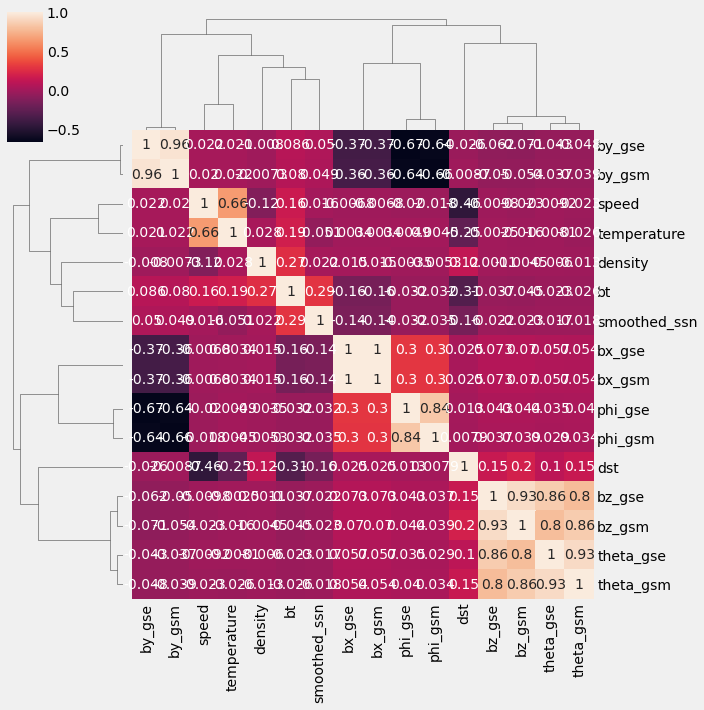

In [10]:
joined = solar_wind.join(sunspots).join(dst).fillna(method="ffill")

plt.figure(figsize=(20, 15))
sns.clustermap(joined.corr(), annot=True)

- The plasma related features like speed and temperature look to be strongly anti-correlated with Dst. The IMF feature bt also exhibits strong anti-correlation.

- the gsm and gse variables are strongly correlated. We probably want to leave some of those out.



### Feature Engineering

In [11]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(2020)
set_seed(2021)

**We've learned from data exploration:**


*1. Features exist across different scales*

We'll fix this using the StandardScaler from scikit-learn. It's a pretty standard affair - it'll help us subtract the mean and divide by the standard deviation for each feature. What's nice about it is that it'll save the parameters used for scaling so that we can re-use it later during prediction. You could also experiment with using the MinMaxScaler or other scaling methods instead.

*2. Features are provided at different frequencies*

One easy way to fix this is to aggregate values to the same frequency. Since our dst values are provided hourly, we'll aggregate solar_wind data to the hour. The timedelta API will make that really easy for us to group by the hour. We'll take both the mean and std of each value for each hour. This would be a great place to experiment with different frequencies and aggregations to try and get the best performance out of your model.

*3. Certain IMF features are highly correlated*

We'll solve this by taking a subset of the data. Let's use the plasma variables temperature, speed, and density, as well as the IMF feature bt. Since we saw that gse and gsm variables were highly correlated, let's only take the gse variables. This is a first pass at subsetting the variables - you may want to take a more principled approach in your implementation.

*4. There are many missing values*

We've already decided to aggregate our minutely solar wind data to an hourly frequency. That'll help with some of the missing values. For the remaining, there are a few different methods we could try. We want something that will be effective that will also work in a real-time environment. For simplicity, we're going to interpolate between missing values using df.interpolate(). Again, this is another great place for experimentation! You could impute using the mean or median, or you might even think about developing another model to estimate the missing values.

Finally, we have our monthly sunspot numbers. These aren't really "missing" - they're just provided at a coarser frequency. We'll fix that by using the forward fill or ffill method of imputation so that the correct monthly number is assigned to each row.

In [12]:
from sklearn.preprocessing import StandardScaler

# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "speed",
    "density",
]

# all of the features we'll use, including sunspot numbers
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)


def impute_features(feature_df):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # interpolate between missing solar wind values
    feature_df = feature_df.interpolate()
    return feature_df


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]

    # aggregate solar wind data and join with sunspots
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed = impute_features(normalized)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler


In [13]:
features, scaler = preprocess_features(solar_wind, sunspots, subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head()

(139872, 15)


bt_mean    bt_std  temperature_mean  \
period  timedelta                                               
train_a 0 days 00:00:00  0.499705  2.443614         -0.375267   
        0 days 01:00:00  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  0.699098 -0.278783         -0.324709   
        0 days 04:00:00  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

In [14]:
assert (features.isna().sum() == 0).all()

Our final feature set is composed of 15 features - the mean and standard deviation of seven solar_wind features, along with smoothed_ssn. We've also saved our scaler object. We'll serialize this later along with our model so that it can be used to preprocess features during prediction.

Before we start modeling, we also have to reshape our label, dst. Remember that we have to predict both t0, the current timestep, and t+1, an hour ahead. We'll train our LSTM to do multi-step prediction by providing it both steps. To do that, we just add another column called t1 that is dst shifted by 1. We'll also renamed our dst column to t0 for consistency.

In [15]:
YCOLS = ["t0", "t1"]


def process_labels(dst):
    y = dst.copy()
    y["t1"] = y.groupby("period").dst.shift(-1)
    y.columns = YCOLS
    return y


labels = process_labels(dst)
labels.head()

t0    t1
period  timedelta                
train_a 0 days 00:00:00  -7 -10.0
        0 days 01:00:00 -10 -10.0
        0 days 02:00:00 -10  -6.0
        0 days 03:00:00  -6  -2.0
        0 days 04:00:00  -2   3.0

Et voilà! Now we have our features and our labels. Let's join them together into one data df so that it's easier to keep the appropriate rows together when splitting into our train, test, and validation sets.

In [16]:
data = labels.join(features)
data.head()

t0    t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                         
train_a 0 days 00:00:00  -7 -10.0  0.499705  2.443614         -0.375267   
        0 days 01:00:00 -10 -10.0  0.547177 -0.224580         -0.479430   
        0 days 02:00:00 -10  -6.0  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  -6  -2.0  0.699098 -0.278783         -0.324709   
        0 days 04:00:00  -2   3.0  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

We want to split our data into three datasets. As you might have guessed, the train set will be used for training. We'll also pass a validation set to keras as it's training to monitor the modeling fitting over epochs. Finally, we'll use a test set to evaluate our model for over or under fitting before we submit to the competition.

We have two atypical concerns to consider when splitting this dataset:

1. We're dealing with timeseries data. Observations in a time series are not indepedent, so we cannot randomly assign observations across our datasets. We also don't want to "cheat" by leaking future information into our training data. In the real-world, we will never be able to train on data from the future, so we should emulate those same contraints here.

2. We have three non-contiguous periods, meaning we have gaps in our data. We don't know how long each gap is or in what order each period occured. We also know that the three periods are differently distributed. That suggests that observations from each period should be included in our train set, instead of reserving one wholesale as our test or validation set.

*To solve these problems, we'll hold out the last 6,000 rows from each period for our test set, and reserve last 3,000 before that for our validation set. The remaining rows will be used in the training set.*

In [17]:
def get_train_test_val(data, test_per_period, val_per_period):
    """Splits data across periods into train, test, and validation"""
    # assign the last `test_per_period` rows from each period to test
    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]
    # assign the last `val_per_period` from the remaining rows to validation
    val = data.groupby("period").tail(val_per_period)
    # the remaining rows are assigned to train
    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(data, test_per_period=6_000, val_per_period=3_000)

In [18]:
### Modelingm


The first thing we have to do is separate our data into sequences and batches for modeling. We have to decide on:

timesteps: this determines the sequence length, ie. how many timesteps in the past to use to predict each step at t0 and t1. Our data is aggregated hourly, so timesteps is equal to the number of hours we want to use for each prediction.
batch_size: this determines the number of samples to work through before a model's parameters are updated.
For this tutorial, we'll choose fairly standard numbers of 32 timesteps per sequence and 32 sequences per batch. These numbers will likely have a large impact on your model, so feel free to experiment.

Now we need to use these numbers to separate our training data and labels into batches of sequences that will be fed into the model. Luckily, keras has just the tool with their timeseries_dataset_from_array function. According to the documentation:

If targets was passed, the dataset yields tuple (batch_of_sequences, batch_of_targets). If not, the dataset yields only batch_of_sequences.

So We can easily specify timesteps (referred to as sequence_length in the documentation) and batchsize to get a feature generator and a target generator that we can pass to model.fit(). For your implementation, you can experiment with different sequence_lengths along with sequence_stride (how many observations to skip between sequences) and sampling_rate (how many observations to sample per sequence).

There's one hiccup - we need to make sure that our sequences don't span across periods. To get around that, we'll iterate through our periods and generate a timeseries dataset for each one. Then we'll concatenate them at the end to rejoin our training set and validation set. And let's not forget - since we're only allowed to use feature data up until t-1, we'll need to realign our features and labels. We'll do that during our loop as well.

In [19]:
import tensorflow as tf
from keras import preprocessing


data_config = {
    "timesteps": 32,
    "batch_size": 32,
}


def timeseries_dataset_from_df(df, batch_size):
    dataset = None
    timesteps = data_config["timesteps"]

    # iterate through periods
    for _, period_df in df.groupby("period"):
        # realign features and labels so that first sequence of 32 is aligned with the 33rd target
        inputs = period_df[XCOLS][:-timesteps]
        outputs = period_df[YCOLS][timesteps:]

        period_ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            inputs,
            outputs,
            timesteps,
            batch_size=batch_size,
        )

        if dataset is None:
            dataset = period_ds
        else:
            dataset = dataset.concatenate(period_ds)

    return dataset


train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds = timeseries_dataset_from_df(val, data_config["batch_size"])

print(f"Number of train batches: {len(train_ds)}")
print(f"Number of val batches: {len(val_ds)}")


Number of train batches: 3804
Number of val batches: 276


Finally, we need to design our LSTM network. We're going to build a simple sequential model with one hidden LSTM layer and one output later with 2 output values (t0 and t1). You can experiment by making your model deep (many layers) or wide (adding more neurons).

There are many hyperparameters that we can tune. We'll concentrate on a few here:

n_epochs: This determines the number of complete passes your model takes through the training data. For this tutorial, we'll choose 20 epochs. You'll want to monitor your rate of convergence to tune this number.
n_neurons: The number of hidden nodes. Usually increases by powers of 2. We'll use 512.
dropout: This regularizes by randomly "ignoring" a dropout fraction of a layer's neurons during each pass through the network during training, so that no particular neuron overfits its input. We'll start with a value of 0.4.
stateful: This determines whether the model keeps track of the historical data that its seen within each batch. Since each sample within a batch encodes the entire sequence we care about, we can set this to False.
Tuning these values will impact how fast your model learns, whether it converges, and affect over/under fitting. Play around to see what works best.

After instantiating the model with these hyperparameters, we'll compile it with mean_squared_error as our loss function and adam as our optimizer. We'll have to remember to take the square root of our loss to get our competition metric, root_mean_squared_error.

In [20]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,LSTM

# define our model
model_config = {"n_epochs": 20, "n_neurons": 512, "dropout": 0.4, "stateful": False}

model = Sequential()
model.add(
    LSTM(
        model_config["n_neurons"],
        # usually set to (`batch_size`, `sequence_length`, `n_features`)
        # setting the batch size to None allows for variable length batches
        batch_input_shape=(None, data_config["timesteps"], len(XCOLS)),
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],
    )
)
model.add(Dense(len(YCOLS)))
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1081344   
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 1,082,370
Trainable params: 1,082,370
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(
    train_ds,
    batch_size=data_config["batch_size"],
    epochs=model_config["n_epochs"],
    verbose=1,
    shuffle=False,
    validation_data=val_ds,
)

Epoch 1/20
3804/3804 [==============================] - 45s 12ms/step - loss: 333.8233 - val_loss: 525.6129
Epoch 2/20
3804/3804 [==============================] - 44s 12ms/step - loss: 302.8677 - val_loss: 459.6397
Epoch 3/20
3804/3804 [==============================] - 45s 12ms/step - loss: 259.3730 - val_loss: 446.6635
Epoch 4/20
3804/3804 [==============================] - 45s 12ms/step - loss: 248.5052 - val_loss: 444.8807
Epoch 5/20
3804/3804 [==============================] - 46s 12ms/step - loss: 221.6367 - val_loss: 368.9016
Epoch 6/20
3804/3804 [==============================] - 45s 12ms/step - loss: 201.9377 - val_loss: 341.4698
Epoch 7/20
3804/3804 [==============================] - 45s 12ms/step - loss: 185.0471 - val_loss: 304.1431
Epoch 8/20
3804/3804 [==============================] - 46s 12ms/step - loss: 173.2809 - val_loss: 295.7892
Epoch 9/20
3804/3804 [==============================] - 46s 12ms/step - loss: 162.7825 - val_loss: 270.4371
Epoch 10/20
3804/3804 [=====

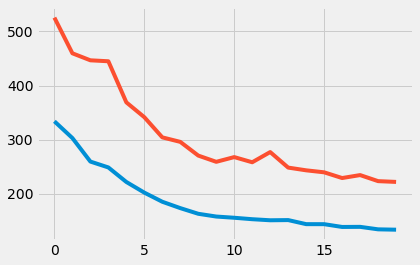

In [22]:
for name, values in history.history.items():
    plt.plot(values)

In [23]:
test_ds = timeseries_dataset_from_df(test, data_config["batch_size"])
mse = model.evaluate(test_ds)
print(f"Test RMSE: {mse**.5:.2f}")

558/558 [==============================] - 4s 7ms/step - loss: 183.9019
Test RMSE: 13.56


In [24]:
import json
import pickle

model.save("model")

with open("scaler.pck", "wb") as f:
    pickle.dump(scaler, f)

data_config["solar_wind_subset"] = SOLAR_WIND_FEATURES
print(data_config)
with open("config.json", "w") as f:
    json.dump(data_config, f)

{'timesteps': 32, 'batch_size': 32, 'solar_wind_subset': ['bt', 'temperature', 'bx_gse', 'by_gse', 'bz_gse', 'speed', 'density']}
